In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  
# Ignore all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from scipy.stats import chi2_contingency


In [3]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h3>Data Preprocessing</h3>

In [6]:
print('Train Dataset Shape',train_df.shape)
print('------------------------------------')
print('Test Dataset Shape',test_df.shape)

Train Dataset Shape (891, 12)
------------------------------------
Test Dataset Shape (418, 11)


In [7]:
train_df['dataset_type']='train'
test_df['dataset_type']='test'
df=pd.concat([train_df,test_df])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [8]:
print('Combine Dataset Shape',df.shape)
df['dataset_type'].value_counts()

Combine Dataset Shape (1309, 13)


dataset_type
train    891
test     418
Name: count, dtype: int64

In [9]:
#Check For Duplicate Records
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1046 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1308 non-null   float64
 10  Cabin         295 non-null    object 
 11  Embarked      1307 non-null   object 
 12  dataset_type  1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


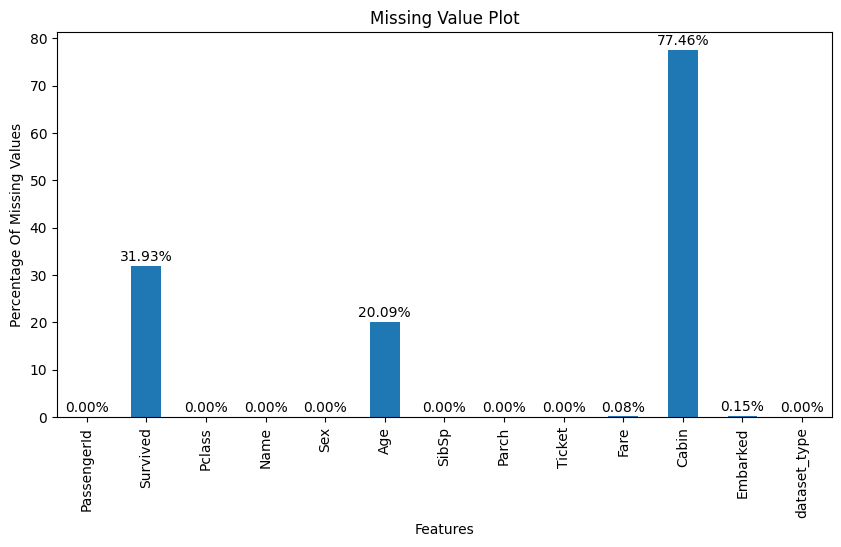

In [11]:
plt.figure(figsize=(10,5))
records=df.isnull().mean()*100
plt.xlabel('Features')
plt.ylabel('Percentage Of Missing Values')
plt.title('Missing Value Plot')
ax = records.plot(kind='bar')

for i, value in enumerate(records):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

<h4>Based on the null value analysis, we observe that the Cabin feature has approximately 77% missing values.
Due to the high percentage of missing data, it's impractical to address this through imputation techniques. 
Therefore, we recommend removing the Cabin column from the dataset to ensure data quality</h4>

<h3>Ticket Feature have Most featue value which least proabibility or impacted feature of prediction of survival
Hence We reomve Ticket Column from datasets
</h3>

In [12]:
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,dataset_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1046 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Fare          1308 non-null   float64
 9   Embarked      1307 non-null   object 
 10  dataset_type  1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [15]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,dataset_type
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1308.000000,1307,1309
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,NaN,S,train
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,NaN,914,891
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,31.275000,NaN,NaN


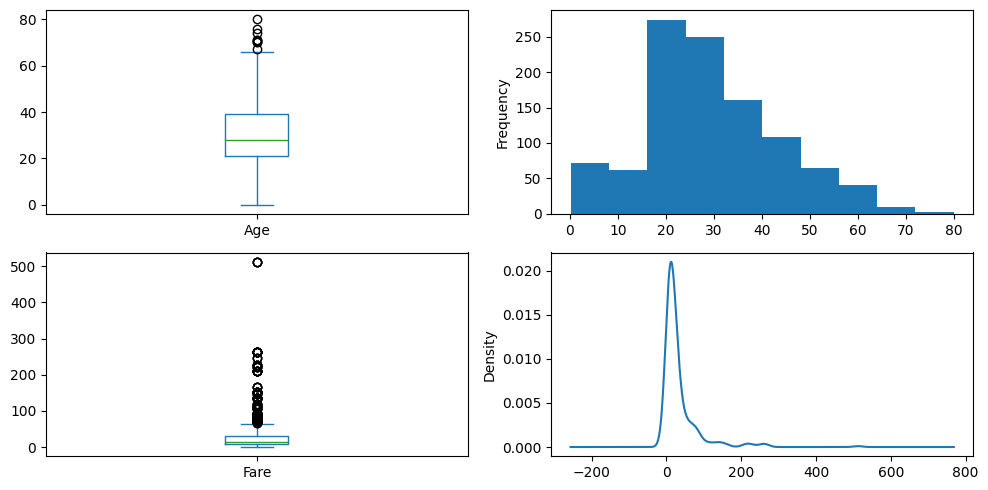

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
df['Age'].plot(kind='box')
plt.subplot(2,2,2)
df['Age'].plot(kind='hist')


plt.subplot(2,2,3)
df['Fare'].plot(kind='box')
plt.subplot(2,2,4)
df['Fare'].plot(kind='kde')



plt.tight_layout()

plt.show()


In [17]:
#Fare Column Have 512 Fare Is Extreme Outier hender we remove that records
#Fare Columns Have Skew right which might affeteced model performance ,Hence to overcome the skew effect we convert them into bins 
df[['Age','Fare']].skew()

Age     0.407675
Fare    4.367709
dtype: float64

In [18]:
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [19]:
print('Avg Fare',df[df['Fare']>100]['Fare'].median())
print('Avg Age',df['Age'].median())
df['Embarked'].value_counts()

Avg Fare 159.1646
Avg Age 28.0


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

<h3>Missing Or Null Value Imputation</h3>

In [20]:
df['Age']=df['Age'].fillna(df['Age'].median())

df['Fare']=df['Fare'].fillna(df[df['Fare']>100]['Fare'].median())

df['Embarked']=df['Embarked'].fillna('S')


In [21]:
fare_bins = [0, 7.89, 14.45, 31.07, 100, 263]
# Define professional labels for each bin
fare_labels = ['Very Low Fare', 'Low Fare', 'Moderate Fare', 'High Fare', 'Very High Fare']
# Create a new column 'Fare_bin' by binning the 'Fare' column
df['Fare_bin'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

age_bins = [0, 12, 21, 28, 39, 80]

# Define professional labels for each bin
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create a new column 'Age_bin' by binning the 'Age' column
df['Age_bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

<ul>
    <li>
        <strong>Age Bins:</strong>
    </li>
    <ul>
        <li>Child: (0 - 12)</li>
        <li>Teenager: (12 - 21)</li>
        <li>Young Adult: (21 - 28)</li>
        <li>Adult: (28 - 39)</li>
        <li>Senior: (39 - 80)</li>
    </ul>
</ul>

<ul>
    <li>
        <strong>Fare Bins:</strong>
    </li>
    <ul>
        <li>Very Low Fare: (0 - 7.89)</li>
        <li>Low Fare: (7.89 - 14.45)</li>
        <li>Moderate Fare: (14.45 - 31.07)</li>
        <li>High Fare: (31.07 - 100)</li>
        <li>Very High Fare: (100 - 263)</li>
    </ul>
</ul>


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,dataset_type,Fare_bin,Age_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train,Very Low Fare,Young Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train,High Fare,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train,Low Fare,Young Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train,High Fare,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train,Low Fare,Adult


In [23]:
#remove unwanted columns from datasets
df.drop(['Fare',"Age"],axis=1,inplace=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,dataset_type,Fare_bin,Age_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,S,train,Very Low Fare,Young Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,train,High Fare,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,S,train,Low Fare,Young Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,train,High Fare,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,S,train,Low Fare,Adult


In [25]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [26]:
def get_unique_titles(names_list):
    parts = names_list.split(',')
    if len(parts) > 1:
        title = parts[1].split('.')[0].strip()  
        return title  
    else:
        return 'Unknown' 




In [27]:
df['Title'] = df['Name'].apply(get_unique_titles)


In [28]:
#We can seet that After Master There few title which are less than 10 records hence we convert them into Others
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [29]:
titles_to_keep = ['Mr', 'Miss', 'Mrs', 'Master']

df['Title'] = df['Title'].apply(lambda x: x if x in titles_to_keep else 'Others')

df['Title'].value_counts()

Title
Mr        757
Miss      260
Mrs       197
Master     61
Others     34
Name: count, dtype: int64

In [30]:
df.drop(['Name'],axis=1,inplace=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,dataset_type,Fare_bin,Age_bin,Title
0,1,0.0,3,male,1,0,S,train,Very Low Fare,Young Adult,Mr
1,2,1.0,1,female,1,0,C,train,High Fare,Adult,Mrs
2,3,1.0,3,female,0,0,S,train,Low Fare,Young Adult,Miss
3,4,1.0,1,female,1,0,S,train,High Fare,Adult,Mrs
4,5,0.0,3,male,0,0,S,train,Low Fare,Adult,Mr


<p>SibSp: Number of siblings and spouses aboard.</p>
<p>Parch: Number of parents and children aboard.</p>
<p>So we create a new feature called FamilySize.</p>


In [32]:
df['FamilySize']=df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,dataset_type,Fare_bin,Age_bin,Title,FamilySize
0,1,0.0,3,male,1,0,S,train,Very Low Fare,Young Adult,Mr,1
1,2,1.0,1,female,1,0,C,train,High Fare,Adult,Mrs,1
2,3,1.0,3,female,0,0,S,train,Low Fare,Young Adult,Miss,0
3,4,1.0,1,female,1,0,S,train,High Fare,Adult,Mrs,1
4,5,0.0,3,male,0,0,S,train,Low Fare,Adult,Mr,0


<Axes: ylabel='Frequency'>

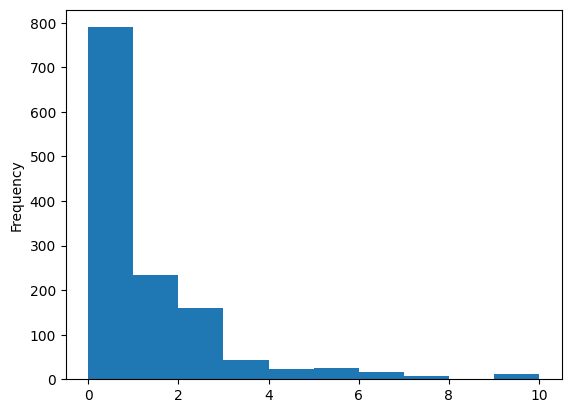

In [33]:
df['FamilySize'].plot(kind='hist')

<p>Here’s how you can categorize family sizes into bins:</p>
<ul>
    <li><strong>Single (0)</strong>: No family members aboard.</li>
    <li><strong>Small Family (1-2)</strong>: 1 or 2 family members aboard.</li>
    <li><strong>Medium Family (3-4)</strong>: 3 or 4 family members aboard.</li>
    <li><strong>Large Family (5-6)</strong>: 5 or 6 family members aboard.</li>
    <li><strong>Very Large Family (7+)</strong>: 7 or more family members aboard.</li>
</ul>


In [34]:
bins = [-1, 0, 2, 4, 6, 10]  # -1 is included to capture 0
labels = ['Single', 'Small Family', 'Medium Family', 'Large Family', 'Very Large Family']

# Create the FamilySize bin feature
df['FamilySizeCategory'] = pd.cut(df['FamilySize'], bins=bins, labels=labels)
df['FamilySizeCategory'].value_counts()

FamilySizeCategory
Single               790
Small Family         394
Medium Family         65
Large Family          41
Very Large Family     19
Name: count, dtype: int64

In [35]:
df.drop(['FamilySize','SibSp','Parch'],axis=1,inplace=True)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,dataset_type,Fare_bin,Age_bin,Title,FamilySizeCategory
0,1,0.0,3,male,S,train,Very Low Fare,Young Adult,Mr,Small Family
1,2,1.0,1,female,C,train,High Fare,Adult,Mrs,Small Family
2,3,1.0,3,female,S,train,Low Fare,Young Adult,Miss,Single
3,4,1.0,1,female,S,train,High Fare,Adult,Mrs,Small Family
4,5,0.0,3,male,S,train,Low Fare,Adult,Mr,Single


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         1309 non-null   int64   
 1   Survived            891 non-null    float64 
 2   Pclass              1309 non-null   int64   
 3   Sex                 1309 non-null   object  
 4   Embarked            1309 non-null   object  
 5   dataset_type        1309 non-null   object  
 6   Fare_bin            1305 non-null   category
 7   Age_bin             1309 non-null   category
 8   Title               1309 non-null   object  
 9   FamilySizeCategory  1309 non-null   category
dtypes: category(3), float64(1), int64(2), object(4)
memory usage: 86.3+ KB


<h3>Chi-Squared Test & Contingency Table </h3>

In [38]:
def chi_squared_test(df, categorical_variable):
    # Create a contingency table
    contingency_table = pd.crosstab(df[categorical_variable], df['Survived'])
    
    # Perform Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p, contingency_table

# List of categorical variables to test
categorical_variables = ['Pclass','Sex','Embarked','Fare_bin', 'Age_bin', 'Title', 'FamilySizeCategory']

# Perform Chi-Squared test for each variable and store results
results = {}
for variable in categorical_variables:
    chi2_stat, p_value, contingency = chi_squared_test(df, variable)
    results[variable] = {
        'Chi-Squared Statistic': chi2_stat,
        'p-value': p_value,
        'Contingency Table': contingency
    }

# Display results
for variable, result in results.items():
    print(f"Variable: {variable}")
    print(f"Chi-Squared Statistic: {result['Chi-Squared Statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")
    print("Contingency Table:")
    print(result['Contingency Table'])
    print("\n" + "-"*40 + "\n")

Variable: Pclass
Chi-Squared Statistic: 102.8890
p-value: 0.0000
Contingency Table:
Survived  0.0  1.0
Pclass            
1          80  136
2          97   87
3         372  119

----------------------------------------

Variable: Sex
Chi-Squared Statistic: 260.7170
p-value: 0.0000
Contingency Table:
Survived  0.0  1.0
Sex               
female     81  233
male      468  109

----------------------------------------

Variable: Embarked
Chi-Squared Statistic: 25.9645
p-value: 0.0000
Contingency Table:
Survived  0.0  1.0
Embarked          
C          75   93
Q          47   30
S         427  219

----------------------------------------

Variable: Fare_bin
Chi-Squared Statistic: 76.2385
p-value: 0.0000
Contingency Table:
Survived        0.0  1.0
Fare_bin                
Very Low Fare   142   43
Low Fare        187   68
Moderate Fare   127  102
High Fare        79   90
Very High Fare   14   36

----------------------------------------

Variable: Age_bin
Chi-Squared Statistic: 16.6489
p-v

<h3>Interpreting Results</h3>
Chi-Squared Statistic: A larger value indicates a stronger association between the categorical variable and survival.

p-value: Typically, a p-value less than 0.05 suggests that there is a statistically significant association between the categorical variable and survival.

By following Above process, you can analyze how different categorical factors relate to survival on the Titanic.

<div>
  <h2>The features most significantly associated with survival on the Titanic are as follows:</h2>
  <ul>
    <li><strong>Sex:</strong> Females had the highest survival rates.</li>
    <li><strong>Title:</strong> Titles reflect gender and social status, correlating strongly with survival chances.</li>
    <li><strong>Pclass:</strong> Higher-class passengers (1st class) had much better survival rates compared to lower classes.</li>
    <li><strong>Fare_bin:</strong> Passengers paying higher fares had better survival chances, consistent with class associations.</li>
    <li><strong>Embarked:</strong> The port of embarkation also plays a role, with certain ports having higher survival rates.</li>
    <li><strong>FamilySizeCategory:</strong> While significant, family size was less impactful than the above features.</li>
    <li><strong>Age_bin:</strong> Although significant, age had the weakest association among these features, with children having the highest survival rates.</li>
  </ul>
  <h3>In summary, Sex and Pclass emerge as the most impactful features regarding survival on the Titanic, closely followed by Title.</h3>
</div>


<h2>Data Visulization</h2>

<h4>Univarite Analysis</h4>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

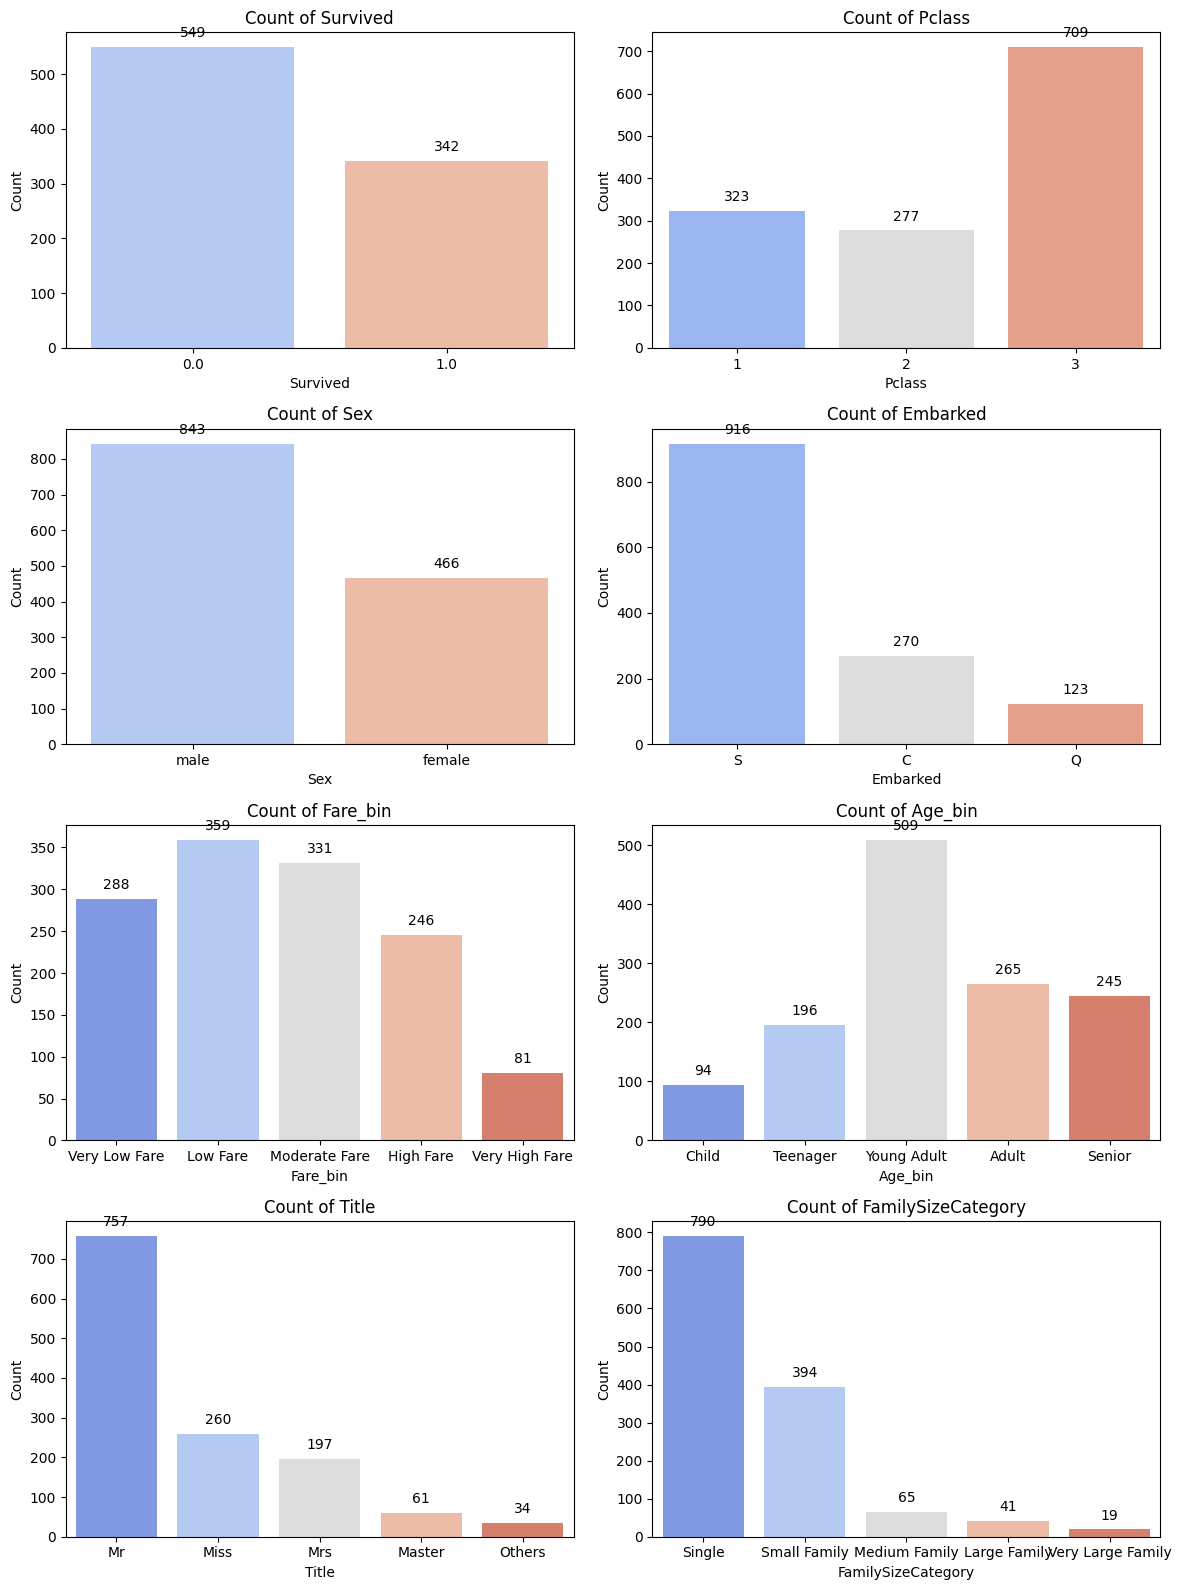

In [39]:
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 
                    'Fare_bin', 'Age_bin', 'Title', 'FamilySizeCategory']

# Set up the subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten to easily index

# Create bar plots for each categorical column using sns.barplot
for idx, col in enumerate(categorical_cols):
    # Calculate counts
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']  # Rename columns for clarity

    # Create the bar plot
    sns.barplot(data=counts, x=col, y='Count', ax=axes[idx], palette='coolwarm')

    axes[idx].set_title(f'Count of {col}')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel(col)

    # Annotate the bars with their values
    for p in axes[idx].patches:
        axes[idx].annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', 
                           fontsize=10, color='black', 
                           xytext=(0, 5),  # 5 points vertical offset
                           textcoords='offset points')

# Remove any empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h4>Bivarite Analysis</h4>

<h3>
Now we analyze features with respect to survival to gain additional knowledge. We have the "Survived" column in the training data with 888 records. In univariate analysis, we consider the total count from both the training and test datasets. However, in bivariate analysis, we only work with the training data to identify patterns.
</h3>

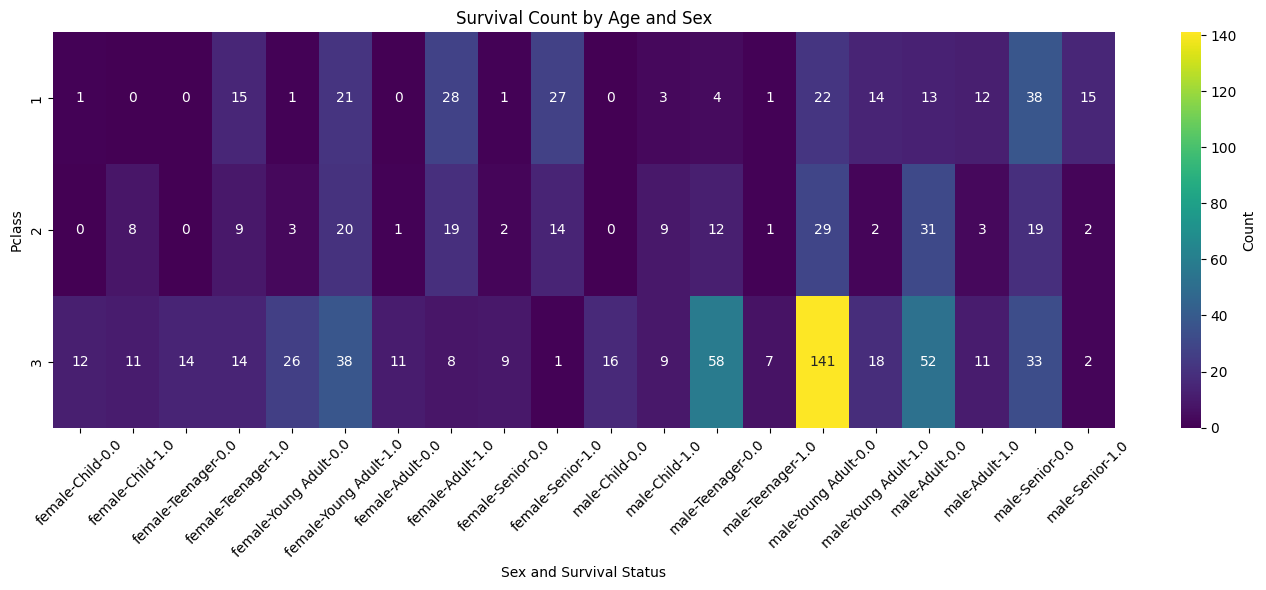

In [40]:
#Survival Analysis by Demographics:
#Investigate survival rates across different age groups and genders.
Demographics_crosstab=pd.crosstab(index=df['Pclass'],columns=[df['Sex'],df['Age_bin'],df['Survived']])
plt.figure(figsize=(14, 6))
sns.heatmap(Demographics_crosstab, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Survival Count by Age and Sex')
plt.ylabel('Pclass')
plt.xlabel('Sex and Survival Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**From the above chart, it is evident that male passengers in Pclass 3 who fall into the Teenager age category were the least likely to have survived.**

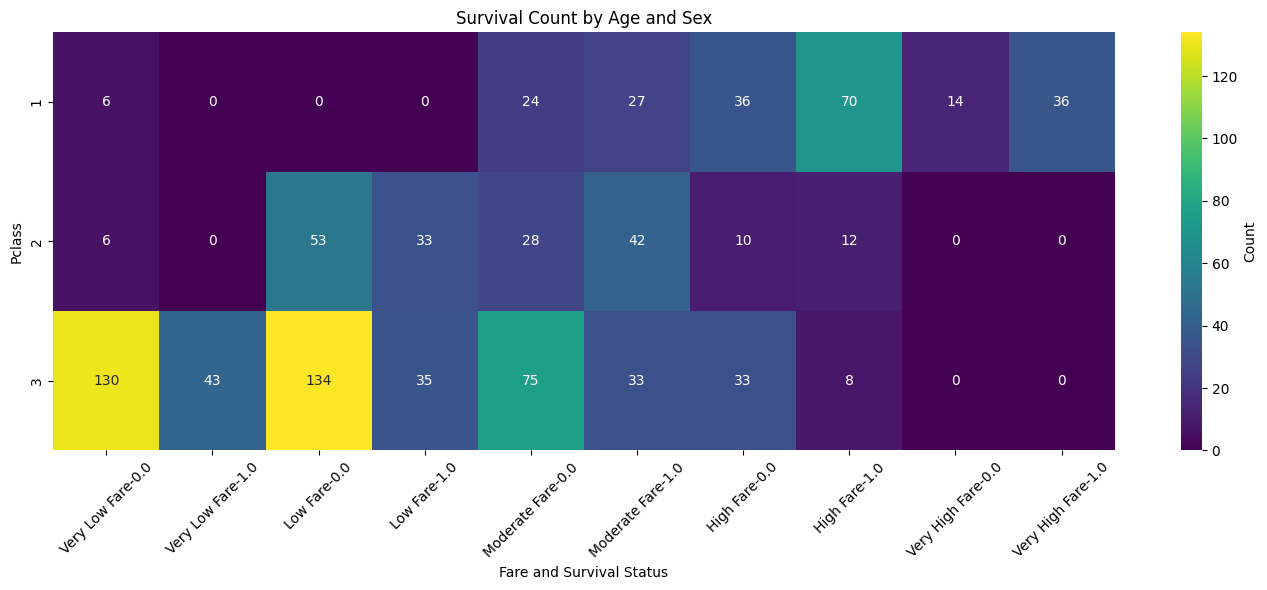

In [41]:
#Socioeconomic Impact:
#Analyze how class and fare influence survival rates.
Socioeconomic_crosstab=pd.crosstab(index=df['Pclass'],columns=[df['Fare_bin'],df['Survived']])
plt.figure(figsize=(14, 6))
sns.heatmap(Socioeconomic_crosstab, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Survival Count by Age and Sex')
plt.ylabel('Pclass')
plt.xlabel('Fare and Survival Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**From the above chart, it is evident that out of a total of 888 passengers in Pclass 3, 264 did not survive. Among those who did not survive, 130 belonged to the "Very Low Fare" category, while 134 were in the "Low Fare" category.**

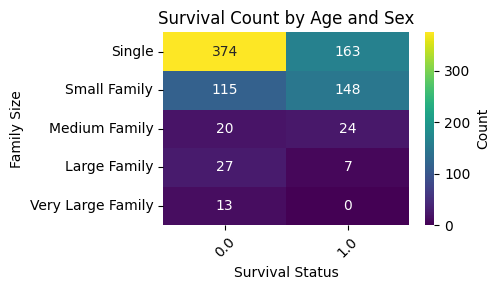

In [42]:
#Family and Social Structure Impact:
#Examine whether family size affected survival chances.

family_crosstab=pd.crosstab(index=df['FamilySizeCategory'],columns=[df['Survived']])
plt.figure(figsize=(5, 3))
sns.heatmap(family_crosstab, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Survival Count by Age and Sex')
plt.ylabel('Family Size')
plt.xlabel('Survival Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

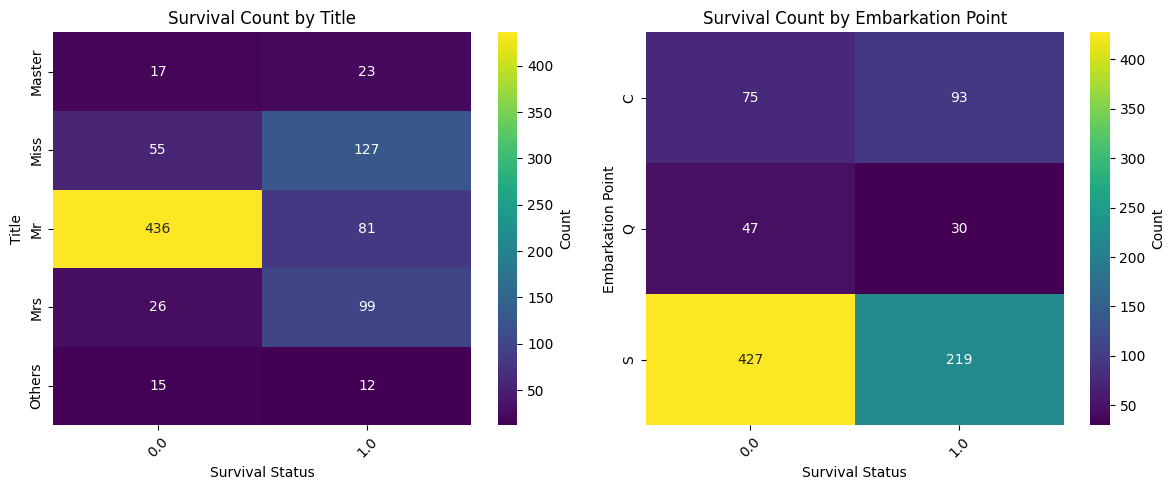

In [43]:
title_crosstab = pd.crosstab(index=df['Title'], columns=[df['Survived']])
# Travel Origin Analysis
embarked_crosstab = pd.crosstab(index=df['Embarked'], columns=[df['Survived']])

# Set up the figure with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Subplot for Title Analysis
plt.subplot(1, 2, 1)
sns.heatmap(title_crosstab, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Survival Count by Title')
plt.ylabel('Title')
plt.xlabel('Survival Status')
plt.xticks(rotation=45)

# Subplot for Travel Origin Analysis
plt.subplot(1, 2, 2)
sns.heatmap(embarked_crosstab, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Survival Count by Embarkation Point')
plt.ylabel('Embarkation Point')
plt.xlabel('Survival Status')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**From the chart, it is evident that passengers with the title 'Mrs.' had the highest number of non-survivors,
totaling 436, while the embarkation point with the highest number of non-survivors was 'S,' with 427 passengers not surviving.**


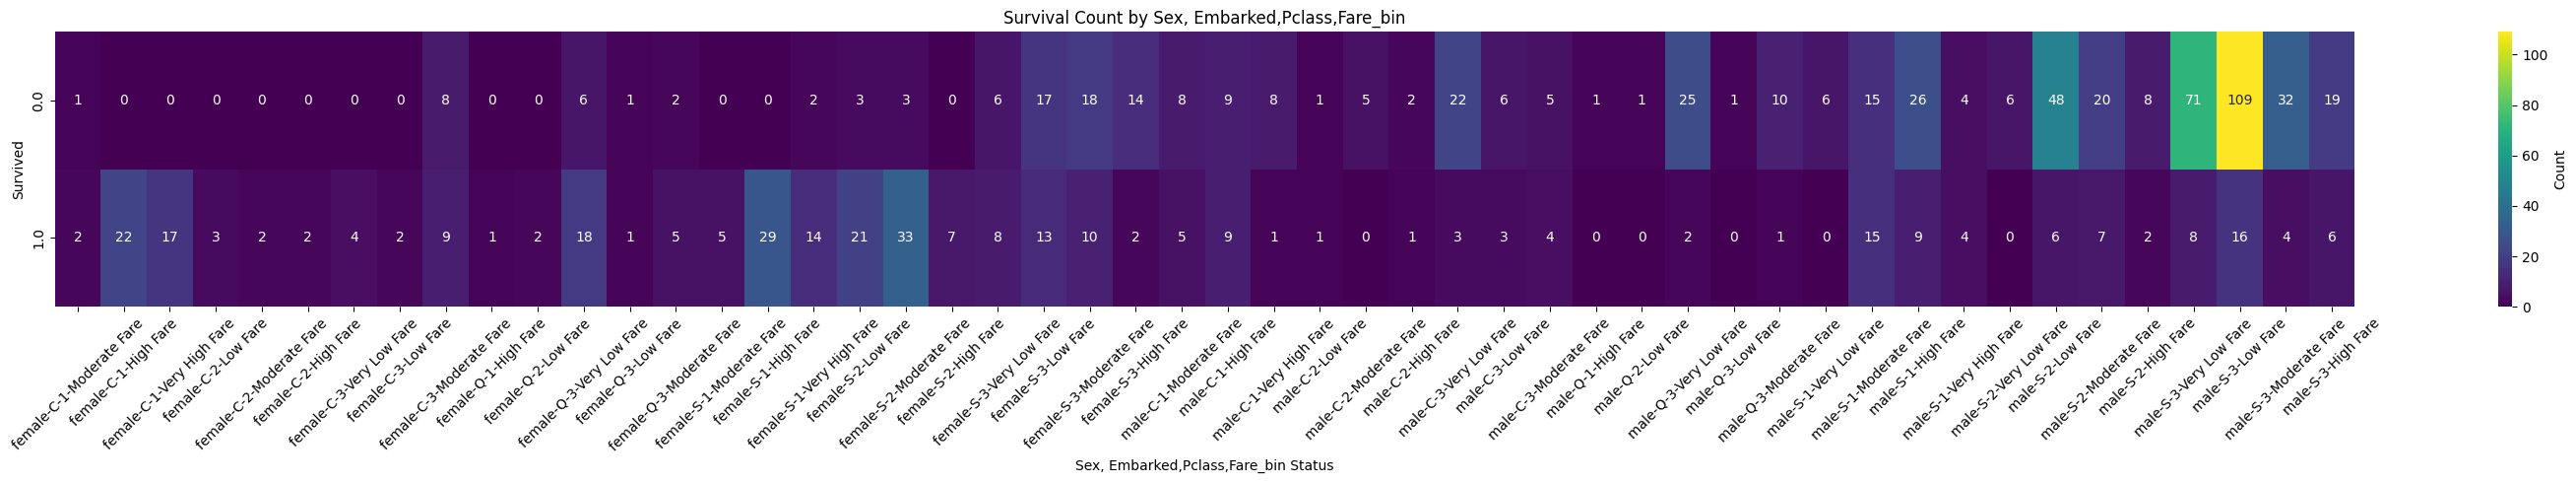

In [44]:
family_crosstab=pd.crosstab(index=df['Survived'],columns=[df['Sex'],df['Embarked'],df['Pclass'],df['Fare_bin']])
plt.figure(figsize=(30, 5))
sns.heatmap(family_crosstab, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Survival Count by Sex, Embarked,Pclass,Fare_bin')
plt.ylabel('Survived')
plt.xlabel('Sex, Embarked,Pclass,Fare_bin Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Model Building And Evalution</h3>

In [45]:
df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,dataset_type,Fare_bin,Age_bin,Title,FamilySizeCategory
0,1,0.0,3,male,S,train,Very Low Fare,Young Adult,Mr,Small Family
1,2,1.0,1,female,C,train,High Fare,Adult,Mrs,Small Family
2,3,1.0,3,female,S,train,Low Fare,Young Adult,Miss,Single
3,4,1.0,1,female,S,train,High Fare,Adult,Mrs,Small Family
4,5,0.0,3,male,S,train,Low Fare,Adult,Mr,Single


In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked', 'dataset_type', 'Fare_bin', 'Age_bin', 'Title', 'FamilySizeCategory'], dtype='object')

In [47]:
columns=['Sex', 'Embarked', 'Fare_bin', 'Age_bin', 'Title', 'FamilySizeCategory']

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()


for column in columns:
    df[column]= label_encoder.fit_transform(df[column])

df.head()



,PassengerId,Survived,Pclass,Sex,Embarked,dataset_type,Fare_bin,Age_bin,Title,FamilySizeCategory
0,1,0.0,3,1,2,train,4,4,2,3
1,2,1.0,1,0,0,train,0,0,3,3
2,3,1.0,3,0,2,train,1,4,1,2
3,4,1.0,1,0,2,train,0,0,3,3
4,5,0.0,3,1,2,train,1,0,2,2


<h3>Now split data into train and test so that we can built model on train datasets</h3>

In [48]:
clean_train_df=df[df['dataset_type']=='train']
clean_test_df=df[df['dataset_type']=='test']


In [49]:
print('Clean Train Dataset Shape',clean_train_df.shape)
print('------------------------------------')
print('Clean Test Dataset Shape',clean_test_df.shape)

Clean Train Dataset Shape (891, 10)
------------------------------------
Clean Test Dataset Shape (418, 10)


In [50]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [51]:

x=clean_train_df[['Pclass','Sex','Embarked','Fare_bin','Age_bin','Title','FamilySizeCategory']]
y=clean_train_df['Survived']

from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [52]:
def train_model(model, model_name):
    print(f'Model: {model_name}')
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'Training Accuracy Score: {train_accuracy:.2f}')
    print(f'Testing Accuracy Score: {test_accuracy:.2f}')
    
    # Generate classification report for testing data
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:')
    print(report)
    
    return model


In [53]:
model_list = dict(
    knn=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2),
    svc=SVC(kernel='linear', random_state=0),
    logistic=LogisticRegression(),
    naive=GaussianNB(),
    tree=DecisionTreeClassifier(criterion='entropy', random_state=0),
    forest=RandomForestClassifier(n_estimators=50, criterion="entropy"),
    xgboost=XGBClassifier(),
    gradientboost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)
)
for key, value in model_list.items():
    print('*'*30)
    train_model(value,key)

******************************
Model: knn
Training Accuracy Score: 0.86
Testing Accuracy Score: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       175
         1.0       0.76      0.66      0.71       120

    accuracy                           0.78       295
   macro avg       0.77      0.76      0.76       295
weighted avg       0.77      0.78      0.77       295

******************************
Model: svc
Training Accuracy Score: 0.78
Testing Accuracy Score: 0.80
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       175
         1.0       0.78      0.70      0.74       120

    accuracy                           0.80       295
   macro avg       0.79      0.78      0.79       295
weighted avg       0.80      0.80      0.79       295

******************************
Model: logistic
Training Accuracy Score: 0.79
Testing Accuracy Scor

<h3>Applying Hyperparameter Tuning with GridSearchCV for Model Optimization</h3>

In [54]:
# Define the model
model = XGBClassifier(random_state=42)

# Set up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=0, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Optionally, evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Score: 0.82890756302521
Test Set Accuracy: 0.823728813559322


In [55]:
model=XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=100,
    subsample=1.0,
    use_label_encoder=False,  # Optional, based on your XGBoost version
    eval_metric='mlogloss'    # Optional, based on your needs
)

train_model(model,'XGBOOST')

Model: XGBOOST
Training Accuracy Score: 0.85
Testing Accuracy Score: 0.83
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       175
         1.0       0.85      0.70      0.77       120

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.81       295
weighted avg       0.83      0.83      0.82       295



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<h3>We will use the XGBoost model to predict the output, achieving an accuracy of 83%</h3>

In [56]:
clean_test_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,dataset_type,Fare_bin,Age_bin,Title,FamilySizeCategory
0,892,NaN,3,1,1,test,4,0,2,2
1,893,NaN,3,0,2,test,4,2,3,3
2,894,NaN,2,1,1,test,1,2,2,2
3,895,NaN,3,1,2,test,1,4,2,2
4,896,NaN,3,0,2,test,1,4,3,3


In [57]:
clean_test_df.shape

(418, 10)

In [58]:
X_test=clean_test_df[['Pclass','Sex','Embarked','Fare_bin','Age_bin','Title','FamilySizeCategory']]


In [59]:
submission_df = pd.DataFrame({
    'PassengerId': clean_test_df['PassengerId'],  
    'Survived': model.predict(X_test) 
})

In [60]:
submission_df.to_csv('submission.csv', index=False)
